# 互评作业1：数据探索性分析与数据预处理
## 数据集2：[Movies Dataset](https://www.kaggle.com/datasets/arsalanrehman/movies-dataset-from-piracy-website)
### 1.数据摘要
#### 1.1属性
- `id` 电影的唯一编码
- `title` 电影的名称
- `storyline`电影故事梗概
- `views` 该电影有多少点击量
- `downloads` 电影下载量
- `IMDb-rating` 电影的IMDb评分
- `appropriate_for` 电影年龄分级，例如PG13
- `language` 电影使用的语言，可以为多语言
- `industry` 制片厂，比如好莱坞、宝莱坞等
- `posted_date` 电影发布时间
- `release_date` 电影全球上映时间
- `run_time` 电影全长
- `director` 导演名
- `writer` 所有编剧的列表

In [196]:
import pandas as pd

movie_df = pd.read_csv("movie/movies_dataset.csv")
movie_df.head()

,Unnamed: 0,IMDb-rating,appropriate_for,director,downloads,id,industry,language,posted_date,release_date,run_time,storyline,title,views,writer
0,0,4.8,R,John Swab,304,372092,Hollywood / English,English,"20 Feb, 2023",Jan 28 2023,105,Doc\r\n facilitates a fragile truce between th...,Little Dixie,"2,794",John Swab
1,1,6.4,TV-PG,Paul Ziller,73,372091,Hollywood / English,English,"20 Feb, 2023",Feb 05 2023,84,Caterer\r\n Goldy Berry reunites with detectiv...,Grilling Season: A Curious Caterer Mystery,"1,002",John Christian Plummer
2,2,5.2,R,Ben Wheatley,"1,427",343381,Hollywood / English,"English,Hindi","20 Apr, 2021",Jun 18 2021,1h 47min,As the world searches for a cure to a disastro...,In the Earth,"14,419",Ben Wheatley
3,3,8.1,NaN,Venky Atluri,"1,549",372090,Tollywood,Hindi,"20 Feb, 2023",Feb 17 2023,139,The life of a young man and his struggles agai...,Vaathi,"4,878",Venky Atluri
4,4,4.6,NaN,Shaji Kailas,657,372089,Tollywood,Hindi,"20 Feb, 2023",Jan 26 2023,122,A man named Kalidas gets stranded due to the p...,Alone,"2,438",Rajesh Jayaraman


发现表格第一列多余，删去

In [197]:
movie_df = movie_df.drop(columns=["Unnamed: 0"])
movie_df.columns.tolist()

['IMDb-rating',
 'appropriate_for',
 'director',
 'downloads',
 'id',
 'industry',
 'language',
 'posted_date',
 'release_date',
 'run_time',
 'storyline',
 'title',
 'views',
 'writer']

#### 1.2标称属性
- `id` 仓库的名称

`id`频数

In [198]:
movie_df['id'].value_counts()

id
372090    402
371744    402
371877    402
372092    202
371991    202
         ... 
303381      1
303380      1
303379      1
303377      1
30459       1
Name: count, Length: 17086, dtype: int64

可以观察到有很多重复的`id`，然而根据我们的想法`id`应当是每部电影唯一的，因此选择一个重复的`id`查看重复原因

In [199]:
movie_df[movie_df['id']==372090]

,IMDb-rating,appropriate_for,director,downloads,id,industry,language,posted_date,release_date,run_time,storyline,title,views,writer
3,8.1,NaN,Venky Atluri,"1,549",372090,Tollywood,Hindi,"20 Feb, 2023",Feb 17 2023,139,The life of a young man and his struggles agai...,Vaathi,"4,878",Venky Atluri
38,8.1,NaN,Venky Atluri,"1,550",372090,Tollywood,Hindi,"20 Feb, 2023",Feb 17 2023,139,The life of a young man and his struggles agai...,Vaathi,"4,882",Venky Atluri
82,8.1,NaN,Venky Atluri,"1,552",372090,Tollywood,Hindi,"20 Feb, 2023",Feb 17 2023,139,The life of a young man and his struggles agai...,Vaathi,"4,889",Venky Atluri
126,8.1,NaN,Venky Atluri,"1,557",372090,Tollywood,Hindi,"20 Feb, 2023",Feb 17 2023,139,The life of a young man and his struggles agai...,Vaathi,"4,900",Venky Atluri
170,8.1,NaN,Venky Atluri,"1,558",372090,Tollywood,Hindi,"20 Feb, 2023",Feb 17 2023,139,The life of a young man and his struggles agai...,Vaathi,"4,905",Venky Atluri
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17461,8.1,NaN,Venky Atluri,"2,369",372090,Tollywood,Hindi,"20 Feb, 2023",Feb 17 2023,139,The life of a young man and his struggles agai...,Vaathi,"7,864",Venky Atluri
17505,8.1,NaN,Venky Atluri,"2,374",372090,Tollywood,Hindi,"20 Feb, 2023",Feb 17 2023,139,The life of a young man and his struggles agai...,Vaathi,"7,873",Venky Atluri
17549,8.1,NaN,Venky Atluri,"2,375",372090,Tollywood,Hindi,"20 Feb, 2023",Feb 17 2023,139,The life of a young man and his struggles agai...,Vaathi,"7,877",Venky Atluri
17593,8.1,NaN,Venky Atluri,"2,378",372090,Tollywood,Hindi,"20 Feb, 2023",Feb 17 2023,139,The life of a young man and his struggles agai...,Vaathi,"7,887",Venky Atluri


可见该`id`372090指向的都是同一部名为《Vaathi》的电影，只是点击量不同，说明我们的代码是正确的，只是数据中存在很多冗余信息，需要对冗余信息进行筛选

In [200]:
idx = movie_df.groupby('id')['views'].transform(max) == movie_df['views']
movie_df = movie_df[idx]
movie_df['id'].value_counts()

id
372091    1
116952    1
117471    1
117368    1
117367    1
         ..
302832    1
302831    1
302830    1
302829    1
371816    1
Name: count, Length: 17085, dtype: int64

此时冗余信息被去除了

In [201]:
movie_df[movie_df['id']==372090]

,IMDb-rating,appropriate_for,director,downloads,id,industry,language,posted_date,release_date,run_time,storyline,title,views,writer
17637,8.1,NaN,Venky Atluri,"2,379",372090,Tollywood,Hindi,"20 Feb, 2023",Feb 17 2023,139,The life of a young man and his struggles agai...,Vaathi,"7,891",Venky Atluri


可见`id=372090`的行只保留了`views`最大的一行

- `title`电影的名称

`title`的频数

In [202]:
movie_df['title'].value_counts()

title
Pinocchio                                5
True Justice                             5
Alone                                    5
Sacrifice                                5
Run                                      4
                                        ..
Malibu Rescue                            1
Life Like                                1
Liu lang di qiu (The Wandering Earth)    1
Stripped (Psycho Stripper)               1
WWE Raw 2023-02-13                       1
Name: count, Length: 16572, dtype: int64

In [203]:
movie_df[movie_df['title']=='Run']

,IMDb-rating,appropriate_for,director,downloads,id,industry,language,posted_date,release_date,run_time,storyline,title,views,writer
3674,6.7,PG-13,Aneesh Chaganty,"8,043",336482,Hollywood / English,English,"21 Nov, 2020",Nov 20 2020,90,"Chloe, a teenager who is confined to a wheelch...",Run,"46,139","Aneesh Chaganty, Sev Ohanian"
5223,5.0,NaN,Scott Graham,937,329073,Hollywood / English,English,"29 May, 2020",Apr 26 2019,78,"In the Northern Scottish town of Fraserburgh, ...",Run,"19,083",Scott Graham
7613,5.4,Not Rated,Ani Kanneganti,"14,023",287544,Tollywood,Telugu,"02 Jan, 2019",Mar 23 2016,110,"Sanju, a jobless computer engineer, who has to...",Run,"52,454","Alphonse Puthren, Ani Kanneganti, Prasanna Kum..."
18618,5.0,NaN,Jeeva,"31,144",6241,Bollywood / Indian,Hindi,"18 Apr, 2011",May 14 2004,137,"Jhanvi Choudhry comes from a wealthy family, w...",Run,"62,926","N. Linguswamy, Kamal Pandey"


说明确实存在同名的电影

- `appropriate_for`电影年龄分级

`approprate_for`频数

In [204]:
movie_df['appropriate_for'].value_counts()

appropriate_for
R                 3752
Not Rated         2132
PG-13             1763
PG                 884
TV-MA              406
TV-14              293
G                  140
Unrated            132
TV-PG              115
TV-G                99
TV-Y7               44
TV-Y                25
Approved             9
NC-17                4
TV-Y7-FV             3
Passed               3
MA-17                1
TV-13                1
Drama                1
Drama, Romance       1
18+                  1
Name: count, dtype: int64

- `language`电影使用的语言

`language`频数

In [205]:
movie_df['language'].value_counts()

language
English                                     10052
Hindi                                        1938
English,Spanish                               388
Punjabi                                       309
Telugu                                        297
                                            ...  
English,Chinese,Min Nan,Korean,Cantonese        1
English,Spanish,Armenian                        1
Bosnian,English,Croatian,German,Serbian         1
English,Korean,Spanish                          1
Spanish,German,English                          1
Name: count, Length: 1167, dtype: int64

- `industry`制片厂

`industry`频数


In [206]:
movie_df['industry'].value_counts()

industry
Hollywood / English    12197
Bollywood / Indian      2420
Anime / Kids            1028
Tollywood                769
Punjabi                  331
Stage shows              124
Pakistani                 92
Wrestling                 78
Dub / Dual Audio          45
3D Movies                  1
Name: count, dtype: int64

- `director`导演名

`director`频数

In [207]:
movie_df['director'].value_counts()

director
David Dhawan                   32
Ram Gopal Varma                27
Vikram Bhatt                   25
Steven Spielberg               24
Priyadarshan                   22
                               ..
Sujeeth                         1
Shonali Bose                    1
Thurop Van Orman, John Rice     1
David Guy Levy                  1
Bimal Roy                       1
Name: count, Length: 9672, dtype: int64

- `writer`所有编剧的列表

`writer`频数

In [208]:
movie_df['writer'].value_counts()

writer
Andrew Jones                                                   11
Dheeraj Rattan                                                 11
Naresh Kathuria                                                11
Jagdeep Singh                                                  10
Justin Lee                                                     10
                                                               ..
Paul Flannery, David Ryan Keith                                 1
Anil Ravipudi, G. Adi Narayana, Narra Praveen                   1
Raj Kumar Gupta                                                 1
Camille Thomasson                                               1
Rajinder Singh Bedi, Saratchandra Chatterjee, Nabendu Ghosh     1
Name: count, Length: 13603, dtype: int64

#### 1.3数值属性
##### 缺失值统计

In [209]:
missing_values = movie_df.isnull().sum()
missing_values = pd.DataFrame(missing_values, columns=['missing_count']).T
missing_values = missing_values.loc[:, (missing_values != 0).any(axis=0)]
missing_values

,IMDb-rating,appropriate_for,director,language,run_time,storyline,writer
missing_count,477,7276,1565,537,999,1321,1819


- `views` 仓库的名称

`views`五数概括

In [210]:
num_views = pd.to_numeric(movie_df['views'].str.replace(',',''))
num_views.describe()[3:]

min        667.0
25%       9899.0
50%      19207.0
75%      43700.0
max    1638533.0
Name: views, dtype: float64

- `downloads` 电影下载量

`downloads`五数概括

In [211]:
num_downloads = pd.to_numeric(movie_df['downloads'].str.replace(',',''))
num_downloads.describe()[3:]

min         0.0
25%      1287.0
50%      3757.0
75%     12224.0
max    391272.0
Name: downloads, dtype: float64

- `IMDb-rating` 电影IMDb评分
  
`IMDb-rating`五数概括

由于`IMDb-rating`存在缺失值，需要筛去缺失值

In [212]:
rating_cleaned = movie_df['IMDb-rating'].dropna()
rating_cleaned.describe()[3:]

min    1.1
25%    4.7
50%    5.7
75%    6.5
max    9.9
Name: IMDb-rating, dtype: float64

- `run_time` 电影全长

`run_time`五数概括

同样存在缺失值，需要先筛去，且`run_time`的记录格式不一，需要进行统一

In [213]:
def convert_to_minutes(duration):
    if 'h' in duration or 'm' in duration:
        return pd.to_timedelta(duration).total_seconds()/60
    else:
        return pd.to_numeric(duration)
    
run_time_cleaned = movie_df['run_time'].dropna().astype(str).apply(convert_to_minutes)
run_time_cleaned.describe()[3:]

min      2.0
25%     90.0
50%     99.0
75%    118.0
max    321.0
Name: run_time, dtype: float64

## 2.数据可视化
### 2.1 电影年龄分级

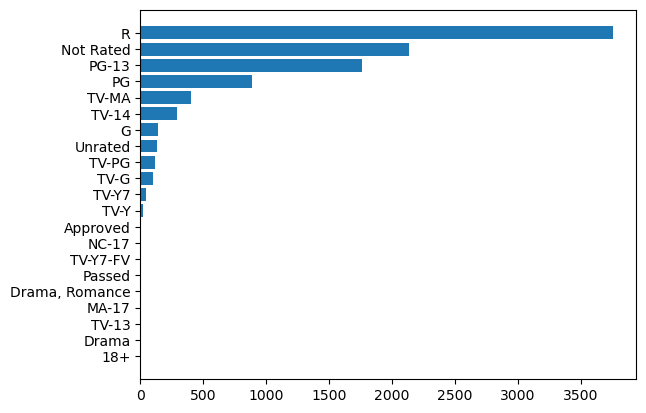

In [214]:
import matplotlib.pyplot as plt

appr_counts = movie_df['appropriate_for'].value_counts().sort_values(ascending=True)
plt.barh(appr_counts.index,appr_counts.values)
plt.show()

### 2.2 电影使用语言

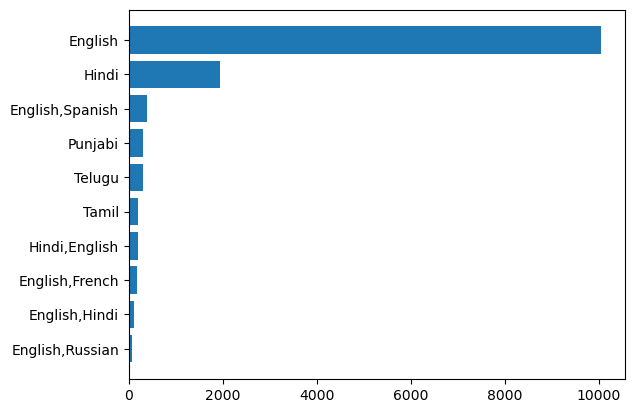

In [215]:
lang_counts = movie_df['language'].value_counts().sort_values()[-10:]
plt.barh(lang_counts.index,lang_counts.values)
plt.show()

### 2.3制片厂

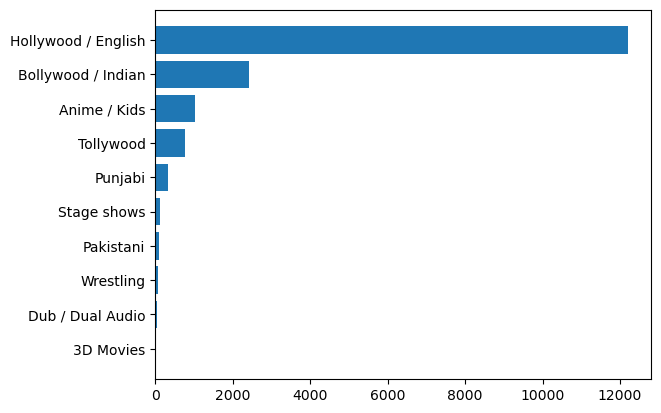

In [216]:
ind_counts = movie_df['industry'].value_counts().sort_values()[-10:]
plt.barh(ind_counts.index,ind_counts.values)
plt.show()

### 2.4 影片发布时间

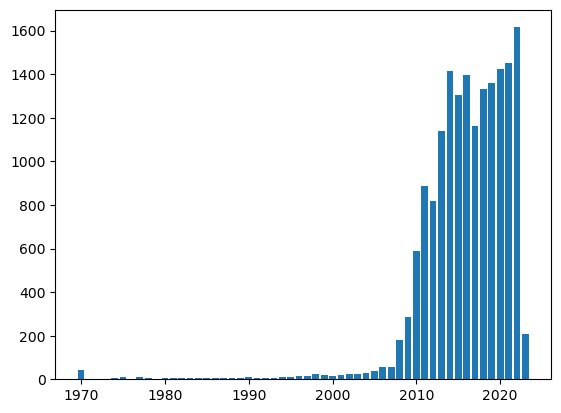

In [217]:
pyear_counts = pd.to_datetime(movie_df['posted_date']).dt.year.value_counts()
plt.bar(pyear_counts.index,pyear_counts.values)
plt.show()

### 2.5影片全球上映时间

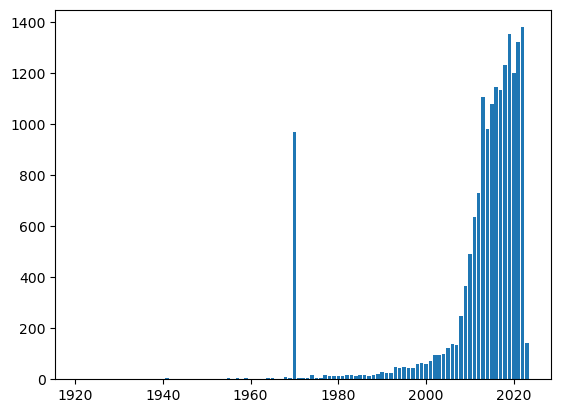

In [218]:
ryear_counts = pd.to_datetime(movie_df['release_date']).dt.year.value_counts()
plt.bar(ryear_counts.index,ryear_counts.values)
plt.show()

### 2.6导演名

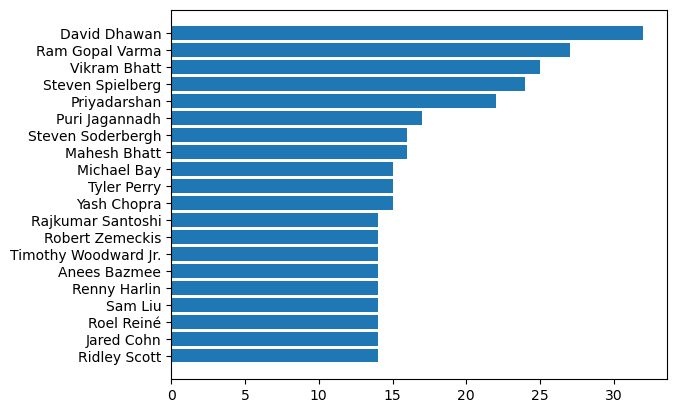

In [219]:
director_counts = movie_df['director'].value_counts().sort_values()[-20:]
plt.barh(director_counts.index,director_counts.values)
plt.show()

### 2.7编剧名

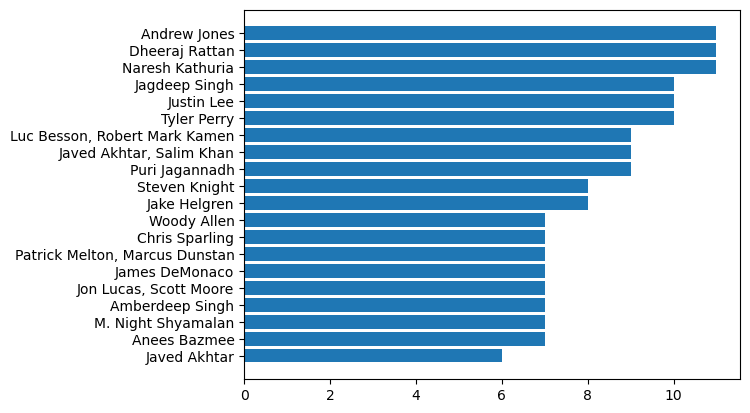

In [220]:
writer_counts = movie_df['writer'].value_counts().sort_values()[-20:]
plt.barh(writer_counts.index,writer_counts.values)
plt.show()

### 2.8电影各项数值属性

Text(0.5, 1.0, 'run_time')

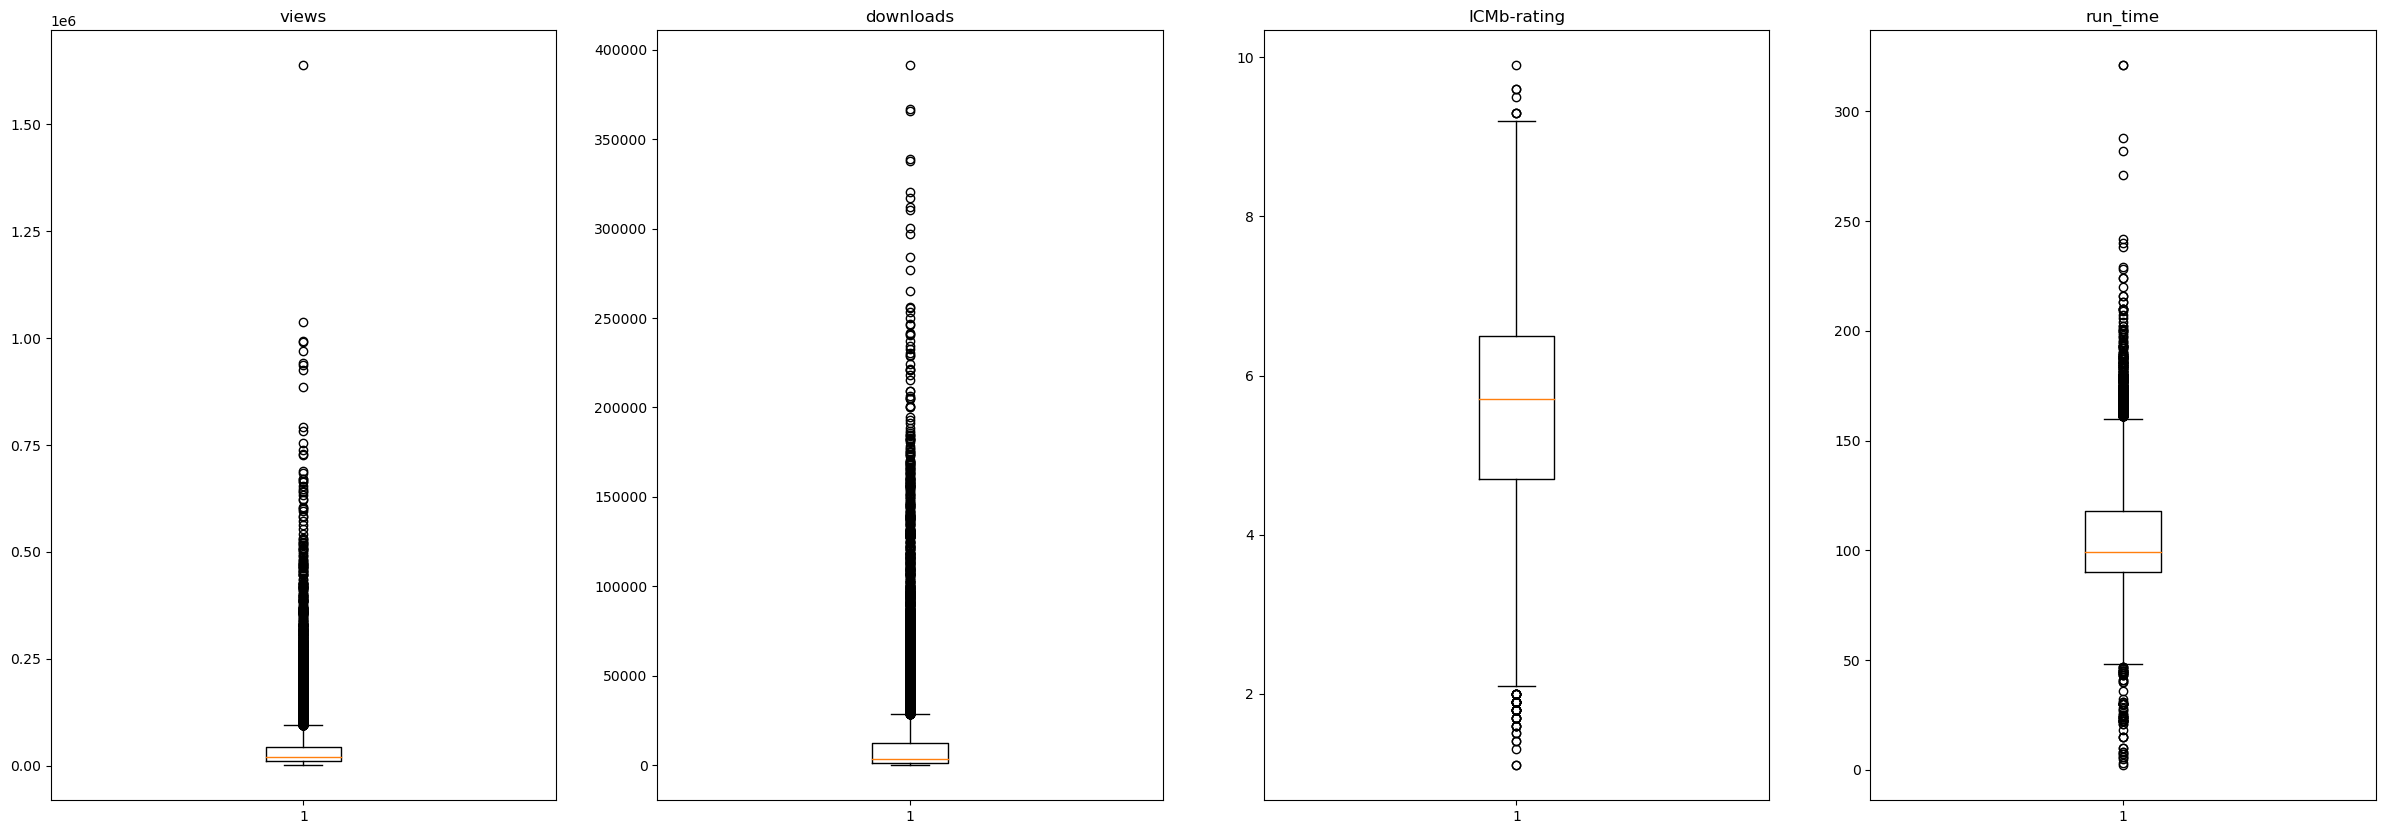

In [221]:
fig,ax=plt.subplots(1,4,figsize=(30,10))
ax[0].boxplot(num_views,)
ax[0].set_title('views')
ax[1].boxplot(num_downloads)
ax[1].set_title('downloads')
ax[2].boxplot(rating_cleaned)
ax[2].set_title('ICMb-rating')
ax[3].boxplot(run_time_cleaned)
ax[3].set_title('run_time')
# plt.boxplot([num_views,num_downloads,rating_cleaned,run_time_cleaned],labels=['views','downloads','ICMb-rating','run_time'] ,showfliers=False,vert=False)

## 3.缺失值处理

In [222]:
missing_values

,IMDb-rating,appropriate_for,director,language,run_time,storyline,writer
missing_count,477,7276,1565,537,999,1321,1819


### 3.1剔除缺失部分

In [223]:
print(movie_df.shape)
movie_df_cleaned = movie_df.dropna()
print(movie_df_cleaned.shape)

(17085, 14)
(8650, 14)


### 3.2用最高频率值填补缺失值

In [224]:
movie_df_cleaned = movie_df.copy()
replace_values = missing_values.copy().rename(index={'missing_count':'replace_values'})
for col in replace_values.columns:
    if missing_values.loc['missing_count',col] == 0:
        continue
    mode = movie_df[col].mode()[0]
    movie_df_cleaned[col].fillna(mode,inplace=True)
    replace_values.loc['replace_values',col] = mode
replace_values

,IMDb-rating,appropriate_for,director,language,run_time,storyline,writer
replace_values,6.2,R,David Dhawan,English,90,A drama based on a memoir about growing up as ...,Andrew Jones


### 3.2通过属性的相关关系填补缺失值
部分`language`属性可通过`industry`属性用下划线分割后的最后一个子串获得，比如"Hollywood/English"

In [225]:
rows_can_fix = movie_df[movie_df['language'].isnull()&movie_df['industry'].notnull()]
rows_can_fix

,IMDb-rating,appropriate_for,director,downloads,id,industry,language,posted_date,release_date,run_time,storyline,title,views,writer
291,NaN,NaN,NaN,265,370047,Wrestling,NaN,"06 Jan, 2023",Jan 05 2023,NaN,NaN,TNA.Impact 2023-01-05,"1,266",NaN
396,5.6,TV-G,Michael Lembeck,193,369257,Hollywood / English,NaN,"17 Dec, 2022",Dec 16 2022,NaN,Your\r\n family is in for a flurry of fun with...,Snow Day,"3,284","Samantha Martin, Will McRobb, Chris Viscardi"
518,NaN,NaN,NaN,"2,847",368289,Wrestling,NaN,"26 Nov, 2022",Nov 25 2022,NaN,NaN,WWE Smackdown 2022-11-26,"7,356",NaN
1453,5.5,NaN,Nyla Innuksuk,593,361520,Hollywood / English,NaN,"27 Jun, 2022",Jun 24 2022,86,When\r\n Maika and her ragtag friends discover...,Slash/Back,"6,863","Ryan Cavan, Nyla Innuksuk"
1637,7.5,Approved,Kirk Harris,580,359910,Hollywood / English,NaN,"21 May, 2022",Apr 01 2022,96,"It centers on Kate, a widow who lost her husba...",Dakota,"5,869",Johnny Harrington
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20118,NaN,NaN,NaN,"10,381",832,Stage shows,NaN,"28 Jun, 2005",Apr 15 2010,NaN,NaN,Sallam Karachi,"17,906",NaN
20271,NaN,NaN,NaN,"5,575",279,Anime / Kids,NaN,"29 Jun, 1998",Jun 29 1998,NaN,NaN,Antz 1998,"15,862",NaN
20458,NaN,NaN,NaN,"3,002",129,Stage shows,NaN,"01 Jan, 1970",Jan 01 1970,NaN,NaN,Munda Pangi Sal Da,"6,362",NaN
20459,NaN,NaN,NaN,"2,628",130,Stage shows,NaN,"01 Jan, 1970",Jan 01 1970,NaN,NaN,Rusmalaiyan,"3,928",NaN


修复结果如下：

In [226]:
import numpy as np
rows_can_fix['language'] = rows_can_fix['industry'].apply(lambda x: x.split()[-1] if '/' in x else np.nan)
rows_can_fix

C:\Users\Administrator\AppData\Local\Temp\ipykernel_68148\3039922195.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rows_can_fix['language'] = rows_can_fix['industry'].apply(lambda x: x.split()[-1] if '/' in x else np.nan)


,IMDb-rating,appropriate_for,director,downloads,id,industry,language,posted_date,release_date,run_time,storyline,title,views,writer
291,NaN,NaN,NaN,265,370047,Wrestling,NaN,"06 Jan, 2023",Jan 05 2023,NaN,NaN,TNA.Impact 2023-01-05,"1,266",NaN
396,5.6,TV-G,Michael Lembeck,193,369257,Hollywood / English,English,"17 Dec, 2022",Dec 16 2022,NaN,Your\r\n family is in for a flurry of fun with...,Snow Day,"3,284","Samantha Martin, Will McRobb, Chris Viscardi"
518,NaN,NaN,NaN,"2,847",368289,Wrestling,NaN,"26 Nov, 2022",Nov 25 2022,NaN,NaN,WWE Smackdown 2022-11-26,"7,356",NaN
1453,5.5,NaN,Nyla Innuksuk,593,361520,Hollywood / English,English,"27 Jun, 2022",Jun 24 2022,86,When\r\n Maika and her ragtag friends discover...,Slash/Back,"6,863","Ryan Cavan, Nyla Innuksuk"
1637,7.5,Approved,Kirk Harris,580,359910,Hollywood / English,English,"21 May, 2022",Apr 01 2022,96,"It centers on Kate, a widow who lost her husba...",Dakota,"5,869",Johnny Harrington
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20118,NaN,NaN,NaN,"10,381",832,Stage shows,NaN,"28 Jun, 2005",Apr 15 2010,NaN,NaN,Sallam Karachi,"17,906",NaN
20271,NaN,NaN,NaN,"5,575",279,Anime / Kids,Kids,"29 Jun, 1998",Jun 29 1998,NaN,NaN,Antz 1998,"15,862",NaN
20458,NaN,NaN,NaN,"3,002",129,Stage shows,NaN,"01 Jan, 1970",Jan 01 1970,NaN,NaN,Munda Pangi Sal Da,"6,362",NaN
20459,NaN,NaN,NaN,"2,628",130,Stage shows,NaN,"01 Jan, 1970",Jan 01 1970,NaN,NaN,Rusmalaiyan,"3,928",NaN


3.3用数据对象之间的相似性填补缺失值

这里采用热卡插补

In [229]:
from sklearn.metrics.pairwise import nan_euclidean_distances

movie_df['views'] = num_views
movie_df['downloads'] = num_downloads
def convert_to_minutes(duration):
    if pd.isna(duration):
        return duration
    elif 'h' in str(duration) or 'm' in str(duration):
        return pd.to_timedelta(duration).total_seconds()/60
    else:
        return pd.to_numeric(duration)
movie_df['run_time'] = movie_df['run_time'].apply(convert_to_minutes)
rows_with_missing = movie_df[movie_df.isnull().any(axis=1)]
numeric_rows_with = rows_with_missing[['views','downloads','IMDb-rating','run_time']]
rows_without_missing = movie_df[~movie_df.isnull().any(axis=1)]
numeric_rows_without = rows_without_missing[['views','downloads','IMDb-rating','run_time']]
interpoted = rows_with_missing.copy()
for row in numeric_rows_with.itertuples():
    # 计算当前行与其他行的欧氏距离，忽略NaN值
    distances = nan_euclidean_distances([numeric_rows_with.loc[row.Index]], numeric_rows_without)[0]
    nearest_row_index = np.argmin(distances)
    nearest_row = rows_without_missing.iloc[nearest_row_index]
    # 使用最近邻行的值填充缺失值
    interpoted.loc[row.Index] = nearest_row

interpoted

,IMDb-rating,appropriate_for,director,downloads,id,industry,language,posted_date,release_date,run_time,storyline,title,views,writer
4,6.0,R,Miranda Bailey,395,312018,Hollywood / English,English,"13 Sep, 2019",Jun 21 2019,109.0,A normal father's family life is turned upside...,You Can Choose Your Family (Being Frank),2519,Glen Lakin
5,5.6,PG,Simon Wincer,584,9918,Hollywood / English,"English,Arabic","05 Mar, 2012",Mar 03 2012,99.0,"Born into a legendary racing family, jockeys D...",The Cup,3027,"Eric O'Keefe, Simon Wincer"
6,5.2,R,Paul Solet,5075,5227,Hollywood / English,English,"06 Jan, 2011",Nov 07 2009,85.0,Madeline Matheson is eight months pregnant and...,Grace,12113,Paul Solet
9,6.1,R,Clark Gregg,1900,93653,Hollywood / English,English,"09 May, 2014",Apr 20 2013,90.0,A struggling agent for child actors and former...,Trust Me,9771,Clark Gregg
10,6.6,R,Brian Goodman,833,405,Hollywood / English,English,"08 Sep, 2009",Sep 08 2009,100.0,An ard car is robbed by three men. A passing p...,What Doesn't Kill You,4575,"Brian Goodman, Paul T. Murray"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20543,8.1,R,"Joel Coen, Ethan Coen",2004,11892,Hollywood / English,English,"04 Oct, 2012",Apr 05 1996,98.0,Jerry works in his father-in-law's car dealers...,Fargo,6185,"Ethan Coen, Joel Coen"
20544,5.2,Not Rated,Turner Clay,6072,12222,Hollywood / English,English,"02 Jan, 2013",Jan 01 2013,90.0,Chaos consumes a small town when a chemical fa...,State of Emergency,16127,Turner Clay
20545,5.5,R,Robert Lieberman,3280,3235,Hollywood / English,English,"25 Oct, 2010",Jan 01 1970,79.0,"In Rutland Country, the six year-old Benjamin ...",The Tortured,6690,Marek Posival
20546,6.3,PG,Sue Ann Taylor,65,336256,Hollywood / English,English,"17 Nov, 2020",Nov 10 2020,94.0,"Coming home from his last deployment, Sgt. Maj...",Charlie's Christmas Wish,1400,Sue Ann Taylor
